In [1]:
import pandas as pd
df = pd.read_csv("ratings_Beauty.csv")
df

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [2]:
USER_COL = "UserId"
ITEM_COL = "ProductId"
RATING_COL = "Rating"
PREDICTION_COL = ""

In [3]:
from pandas.api.types import CategoricalDtype
from scipy import sparse

users = df[USER_COL].unique()
items = df[ITEM_COL].unique()
shape = (len(users), len(items))

# Create indices for users and movies
user_cat = CategoricalDtype(categories=sorted(users), ordered=True)
item_cat = CategoricalDtype(categories=sorted(items), ordered=True)
df['UserIndex'] = df[USER_COL].astype(user_cat).cat.codes
df['ItemIndex'] = df[ITEM_COL].astype(item_cat).cat.codes
user_map = df[["UserIndex", USER_COL]].drop_duplicates().sort_values(['UserIndex']).set_index('UserIndex', verify_integrity=True)
item_map = df[["ItemIndex", ITEM_COL]].drop_duplicates().sort_values(['ItemIndex']).set_index('ItemIndex', verify_integrity=True)

# Conversion via COO matrix
coo = sparse.coo_matrix((df[RATING_COL], (df['UserIndex'], df['ItemIndex'])), shape=shape)
csr = coo.tocsr()

In [4]:
df

,UserId,ProductId,Rating,Timestamp,UserIndex,ItemIndex
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200,725046,0
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200,814606,1
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200,313101,1
3,A1WMRR494NWEWV,0733001998,4.0,1382572800,291075,2
4,A3IAAVS479H7M7,0737104473,1.0,1274227200,802842,3
...,...,...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000,759765,249269
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000,759765,249270
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400,1035084,249271
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200,1195527,249272


In [2]:
from utils import pandas_df_to_csr

In [5]:
user_index, item_index, ratings_csr = pandas_df_to_csr(df)
ratings_csr

<1210271x249274 sparse matrix of type '<class 'numpy.float64'>'
	with 2023070 stored elements in Compressed Sparse Row format>

In [49]:
user_map = df[["UserIndex", "UserId"]].drop_duplicates().sort_values(['UserIndex']).set_index('UserIndex', verify_integrity=True)
user_map

,UserId
UserIndex,
0,A00008821J0F472NDY6A2
1,A000186437REL8X2RW8UW
2,A0002574WYJMBWKNCPY8
3,A00029263J863WSR0TDRS
4,A00031961JI1CBNV98TW
...,...
1210266,AZZZLZXCEE4WK
1210267,AZZZMSZI9LKE6
1210268,AZZZO4QCZROW8


In [27]:
user_map = df[["UserIndex", "UserId"]]
user_map = user_map.drop_duplicates()
user_map

,UserIndex,UserId
0,725046,A39HTATAQ9V7YF
1,814606,A3JM6GV9MNOF9X
2,313101,A1Z513UWSAAO0F
3,291075,A1WMRR494NWEWV
4,802842,A3IAAVS479H7M7
...,...,...
2023054,1012502,ADQ41IJPQW2TN
2023058,254698,A1SJD7QDROVPCC
2023059,1030275,AFPRQT3V8C1U1
2023061,249628,A1RYQPQ01T5D5R


In [29]:
user_map = user_map.sort_values(['UserIndex'])
user_map

,UserIndex,UserId
1609862,0,A00008821J0F472NDY6A2
299576,1,A000186437REL8X2RW8UW
1791795,2,A0002574WYJMBWKNCPY8
1557570,3,A00029263J863WSR0TDRS
898429,4,A00031961JI1CBNV98TW
...,...,...
1051117,1210266,AZZZLZXCEE4WK
1075015,1210267,AZZZMSZI9LKE6
1768894,1210268,AZZZO4QCZROW8
1169932,1210269,AZZZRS1YZ8HVP


In [30]:
user_map = user_map.set_index('UserIndex', verify_integrity=True)
user_map

,UserId
UserIndex,
0,A00008821J0F472NDY6A2
1,A000186437REL8X2RW8UW
2,A0002574WYJMBWKNCPY8
3,A00029263J863WSR0TDRS
4,A00031961JI1CBNV98TW
...,...
1210266,AZZZLZXCEE4WK
1210267,AZZZMSZI9LKE6
1210268,AZZZO4QCZROW8


In [45]:
user_map.loc[range(5)]

,UserId
UserIndex,
0,A00008821J0F472NDY6A2
1,A000186437REL8X2RW8UW
2,A0002574WYJMBWKNCPY8
3,A00029263J863WSR0TDRS
4,A00031961JI1CBNV98TW


#### Find userId mapping

In [ ]:
user_map.loc[user_map["UserId"]=="A3KEZLJ59C1JVH"]

### Read products image dataset

In [1]:
import io
import bson                       # this is installed with the pymongo package
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import io as sio
# sio.use_plugin('matplotlib', 'imread')

10


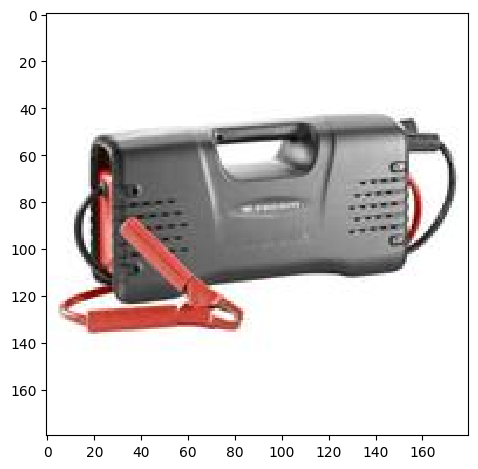

In [2]:
# Simple data processing

data = bson.decode_file_iter(open('test.bson', 'rb'))

# prod_to_category = dict()

for c, d in enumerate(data):
    product_id = d['_id']
    print(product_id)
    # category_id = d['category_id'] # This won't be in Test data
    # prod_to_category[product_id] = category_id
    for e, pic in enumerate(d['imgs']):
        picture = imread(io.BytesIO(pic['picture']))
        # do something with the picture, etc
        imshow(picture)
    break

### Connect to mongodb

In [3]:
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["test"]
mycol = mydb["products"]


In [4]:
myquery = { "_id": 10 }

49


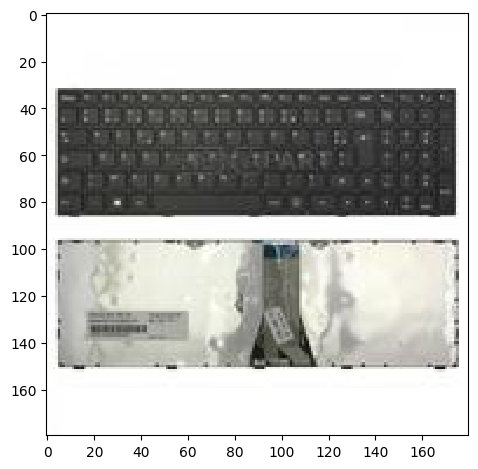

In [13]:
for x in mycol.find():
    product_id = x['_id']
    print(product_id)
    # category_id = d['category_id'] # This won't be in Test data
    # prod_to_category[product_id] = category_id
    for e, pic in enumerate(x['imgs']):
        picture = imread(io.BytesIO(pic['picture']))
        # do something with the picture, etc
        imshow(picture)
    break

In [11]:
def get_product_image(product_id: int):
    query = { "_id": product_id }
    for x in mycol.find(query):
        for e, pic in enumerate(x['imgs']):
            picture = imread(io.BytesIO(pic['picture']))
            # do something with the picture, etc
            # imshow(picture)
    return picture

### Test gradio

In [9]:
import gradio as gr

/Users/tgayanvitharanagamage/anaconda3/envs/rec-sys-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
def greet(name):
    return "Hello " + name + "!"

# demo = gr.Interface(fn=greet, inputs="text", outputs="text")
demo = gr.Interface(fn=get_product_image, inputs="number", outputs="image")

demo.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


In [15]:
myclient.close()